# First Spark Streaming Example

## Twitter Example

In [1]:
import findspark

In [2]:
import os

In [3]:
import os
print(os.getcwd())
#print(os.path.dirname(os.path.realpath(__file__)) )

/home/tomato/docker_spark/codes


In [4]:
# your path will likely not have 'matthew' in it. Change it to reflect your path.
#findspark.init('home/tomato/opt/spark-3.0.3-bin-hadoop2.7')

In [5]:
# May cause deprecation warnings, safe to ignore, they aren't errors
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [6]:
# Can only run this once. restart your kernel for any errors.
sc = SparkContext()

21/09/29 14:51:23 WARN Utils: Your hostname, tomato-15ZD90N-VX30K resolves to a loopback address: 127.0.1.1; using 192.168.0.9 instead (on interface wlp0s20f3)
21/09/29 14:51:23 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/09/29 14:51:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [7]:
ssc = StreamingContext(sc, 10 )
sqlContext = SQLContext(sc)

In [8]:
socket_stream = ssc.socketTextStream("127.0.0.1", 5555)

In [9]:
lines = socket_stream.window( 20 )

In [10]:
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

In [11]:
# Use Parenthesis for multiple lines or use \.
( lines.flatMap( lambda text: text.split( " " ) ) #Splits to a list
  .filter( lambda word: word.lower().startswith("#") ) # Checks for hashtag calls
  .map( lambda word: ( word.lower(), 1 ) ) # Lower cases the word
  .reduceByKey( lambda a, b: a + b ) # Reduces
  .map( lambda rec: Tweet( rec[0], rec[1] ) ) # Stores in a Tweet Object
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") ) # Sorts Them in a DF
  .limit(10).registerTempTable("tweets") ) ) # Registers to a table.

In [12]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
# Only works for Jupyter Notebooks!
%matplotlib inline 

In [13]:
ssc.start()

21/09/29 14:52:06 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
21/09/29 14:52:06 WARN BlockManager: Block input-0-1632894726000 replicated to only 0 peer(s) instead of 1 peers
21/09/29 14:52:06 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
21/09/29 14:52:06 WARN BlockManager: Block input-0-1632894726600 replicated to only 0 peer(s) instead of 1 peers
21/09/29 14:52:07 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
21/09/29 14:52:07 WARN BlockManager: Block input-0-1632894727600 replicated to only 0 peer(s) instead of 1 peers
21/09/29 14:52:09 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
21/09/29 14:52:09 WARN BlockManager: Block input-0-1632894728800 replicated to only 0 peer(s) instead of 1 peers
21/09/29 14:52:09 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
21/09/29 14:52:09 WARN BlockManager: Block input-0-1632894729400 replicated to

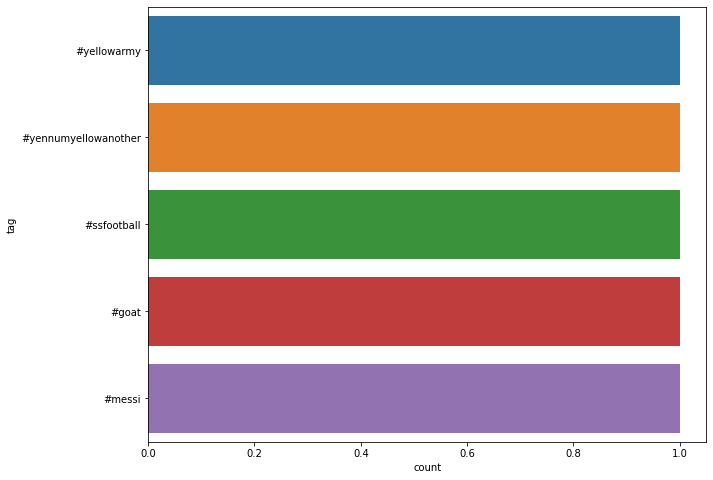

21/09/29 14:52:54 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
21/09/29 14:52:54 WARN BlockManager: Block input-0-1632894774400 replicated to only 0 peer(s) instead of 1 peers
21/09/29 14:52:55 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
21/09/29 14:52:55 WARN BlockManager: Block input-0-1632894774800 replicated to only 0 peer(s) instead of 1 peers
21/09/29 14:52:57 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
21/09/29 14:52:57 WARN BlockManager: Block input-0-1632894777400 replicated to only 0 peer(s) instead of 1 peers
21/09/29 14:52:57 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
21/09/29 14:52:57 WARN BlockManager: Block input-0-1632894777600 replicated to only 0 peer(s) instead of 1 peers
21/09/29 14:53:00 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
21/09/29 14:53:00 WARN BlockManager: Block input-0-1632894780200 replicated to

21/09/29 14:54:17 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
21/09/29 14:54:17 WARN BlockManager: Block input-0-1632894857400 replicated to only 0 peer(s) instead of 1 peers
21/09/29 14:54:21 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
21/09/29 14:54:21 WARN BlockManager: Block input-0-1632894861400 replicated to only 0 peer(s) instead of 1 peers
21/09/29 14:54:28 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
21/09/29 14:54:28 WARN BlockManager: Block input-0-1632894868000 replicated to only 0 peer(s) instead of 1 peers
21/09/29 14:54:36 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
21/09/29 14:54:36 WARN BlockManager: Block input-0-1632894876400 replicated to only 0 peer(s) instead of 1 peers
21/09/29 14:54:38 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
21/09/29 14:54:38 WARN BlockManager: Block input-0-1632894878600 replicated to

In [14]:
count = 0
while count < 10:
    try:
        time.sleep( 3 )
        top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
        top_10_df = top_10_tweets.toPandas()
        display.clear_output(wait=True)
        plt.figure( figsize = ( 10, 8 ) )
        sns.barplot( x="count", y="tag", data=top_10_df)
        plt.show()
        count = count + 1
    except:
        continue